In [30]:
from torchvision import models, transforms
from torchsummary import summary
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt


import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

from lib.src import *
from lib.utils import *

from pytorch_grad_cam import GradCAM, HiResCAM, AblationCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50


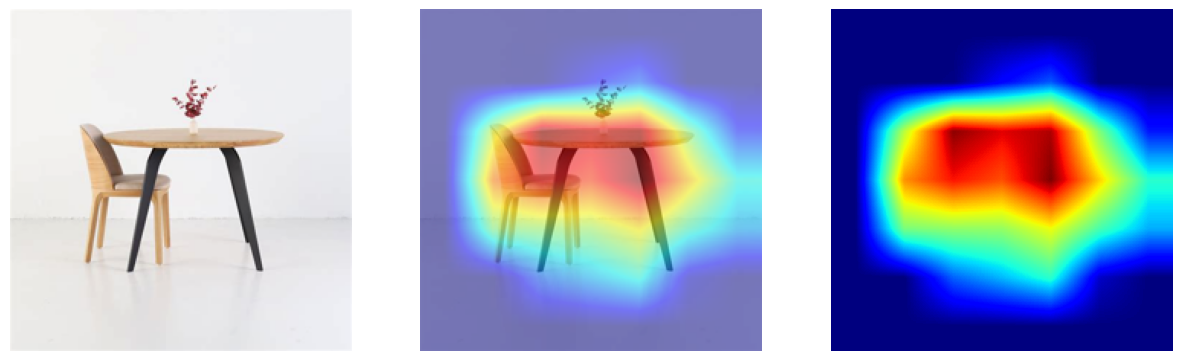

folding chair
57.13639831542969
559


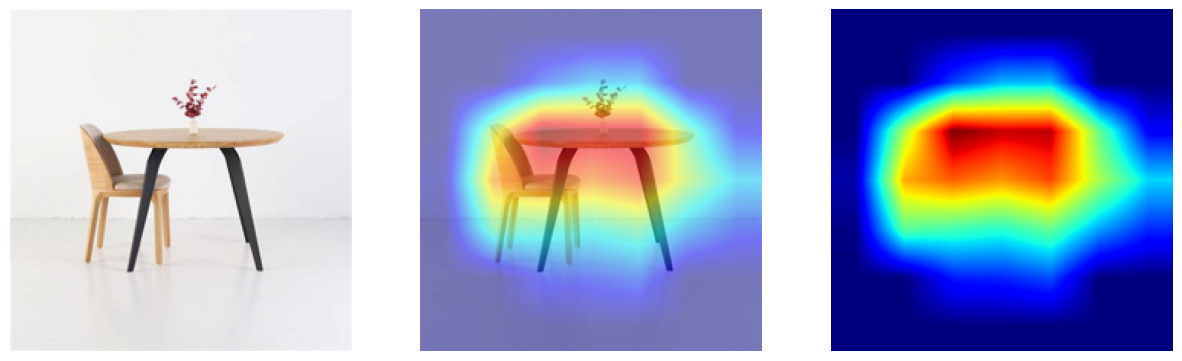

dining table
37.04762649536133
532


In [31]:
path = 'images/stół_krzeselko.jpg'

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

img = get_image_torch(path, 224, 224)
model.eval()
out = model(img.unsqueeze(0))

# list top-5 classes predicted by model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(class_names[idx], percentage[idx].item(), idx) for idx in indices[0][:5]]


for indice in indices[:, :2][0]:
    idx = indice.item()
    input_tensor = get_image_torch(path, 224, 224).unsqueeze(0)
    targets = [ClassifierOutputTarget(idx)]

    with GradCAMPlusPlus(model=model, target_layers=target_layers) as cam:
      gradcam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
    overlay_plot_torch(input_tensor.squeeze(), gradcam, 0.5)
    print(class_names[idx])
    #print softmax value
    print(percentage[idx].item())
    print(idx)

In [32]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import imageio
import numpy as np

input_tensor = get_image_torch('images/stół_krzeselko.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(532)]

with GradCAMPlusPlus(model=model, target_layers=target_layers) as cam:
    cam = cam(input_tensor=input_tensor, targets=targets).squeeze(0)

gif_images = []

for threshold in np.arange(0.00, 1.0, 0.01):
    cut_img = delete_the_least_important_pixels(input_tensor.squeeze(), cam, threshold)
    
    cut_img_np = cut_img.permute(1, 2, 0).detach().cpu().numpy()
    
    gif_images.append((cut_img_np * 255).astype(np.uint8))

imageio.mimsave('chair_gradcam.gif', gif_images, duration=0.1)

In [33]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import imageio
import numpy as np

input_tensor = get_image_torch('images/stół_krzeselko.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(559)]

with GradCAMPlusPlus(model=model, target_layers=target_layers) as cam:
    cam_husky_lib = cam(input_tensor=input_tensor, targets=targets).squeeze(0)

gif_images = []

for threshold in np.arange(0.00, 1.0, 0.01):
    cut_img = delete_the_least_important_pixels(input_tensor.squeeze(), cam_husky_lib, threshold)
    
    cut_img_np = cut_img.permute(1, 2, 0).detach().cpu().numpy()
    
    gif_images.append((cut_img_np * 255).astype(np.uint8))

imageio.mimsave('table_gradcam.gif', gif_images, duration=0.1)

In [34]:
path = 'images/husky.jpg'

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

img = get_image_torch(path, 224, 224)
model.eval()
out = model(img.unsqueeze(0))

# print softmax

out = torch.nn.functional.softmax(out, dim=1)

out[0, 250]

tensor(0.4359, grad_fn=<SelectBackward0>)

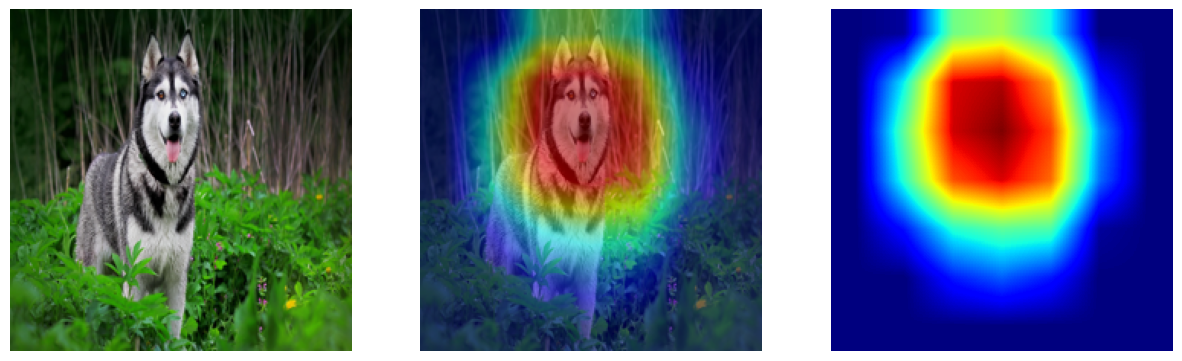

In [35]:
gradcam = get_gradcamplusplus(img, model, model.layer4[-1].conv3)
overlay_plot_torch(img, gradcam, 0.5)

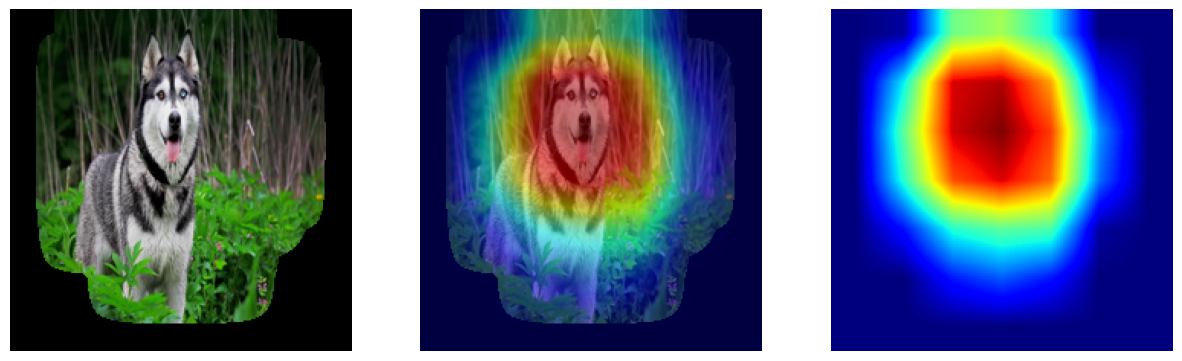

In [36]:
img_d = delete_the_least_important_pixels(img, gradcam, 0.01)
overlay_plot_torch(img_d, gradcam, 0.5)

In [37]:
model.eval()
out = model(img_d.unsqueeze(0))

out = torch.nn.functional.softmax(out, dim=1)

out[0, 250]

tensor(0.3580, grad_fn=<SelectBackward0>)

In [38]:
id_name = dict()
dups_id_name = dict()

for i, name in enumerate(open('imagenet_classes.txt', 'r')):
    name = name[:-1]
    name = name.lower()
    name = name.replace(' ', '_')
    id_name[i] = name

len(id_name)

1000

In [39]:
hash_name = dict()
dups_hash_name = dict()

for line in open('imagenet.txt', 'r'):
    line = line[:-1]
    h, i, n = line.split()
    n = n.lower()
    hash_name[h] = n
len(hash_name)

1000

In [40]:
DICT = dict()

for k1, v1 in id_name.items():
    for k2, v2 in hash_name.items():
        if v1 == v2:
            DICT[k1] = (k1, k2, v1)
            DICT[k2] = (k1, k2, v1)
len(DICT)

2000

In [41]:
# iterate over some classes
# iterate over some pic
# count softmax
# apply deletion
# count softmax on deletion

In [ ]:
import random
import os
from tqdm import tqdm


model = resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
targets = []

first = []
second = []

i = 0
for dir_name in tqdm(random.sample(os.listdir('imagenet-mini/train'), 5)):
    print(i)
    i += 1
    print(dir_name)
    for file_name in random.sample(os.listdir(f'imagenet-mini/train/{dir_name}'), 5):
        orginal_img = get_image_torch(f'imagenet-mini/train/{dir_name}/{file_name}', 224, 224)
        id, hash, name = DICT[dir_name]

        model.eval()
        print(orginal_img.shape)
        out = model(orginal_img.unsqueeze(0))
        out = torch.nn.functional.softmax(out, dim=1)

        print('before', name, out[0, id].item())

        first.append(out[0, id].item())

        print('true', name, out[0, id].item())

        # argmax 

        model.eval()
        out = model(orginal_img.unsqueeze(0))
        out = torch.nn.functional.softmax(out, dim=1)
        argmax = torch.argmax(out, dim=1)
        print('predicted', DICT[argmax.item()][2], out[0, argmax].item())
        print(dir_name, file_name)

        
        gradcam = get_gradcamplusplus(orginal_img, model, target_layers[0], id)

        #with GradCAM(model=model, target_layers=target_layers) as cam:
        #    gradcam = cam(orginal_img.unsqueeze(0), targets=[ClassifierOutputTarget(id)]).squeeze(0)

       #overlay_plot_torch(orginal_img, gradcam, 0.5)

        del_image = delete_the_least_important_pixels(orginal_img, gradcam, 0.001)

        gradcam = get_gradcamplusplus(del_image, model, target_layers[0], id)

        #with GradCAM(model=model, target_layers=target_layers) as cam:
        #    gradcam = cam(del_image.unsqueeze(0), targets=[ClassifierOutputTarget(id)]).squeeze(0)

        overlay_plot_torch(del_image, gradcam, 0.5)

        model.eval()
        out = model(del_image.unsqueeze(0))
        out = torch.nn.functional.softmax(out, dim=1)
        print('del', name, out[0, id].item())

        print('after', name, out[0, id].item())
        second.append(out[0, id].item())



        plt.imshow(orginal_img.permute(1, 2, 0))
        plt.axis('off')
        plt.show()



In [44]:
first_arr = np.array(first)
second_arr = np.array(second)
np.maximum(0, first_arr - second_arr).sum() / first_arr.shape[0], (first_arr < second_arr).sum() / first_arr.shape[0]

(0.1351749960459506, 0.28)